In [1]:
import pandas as pd
import json
import seaborn as sns

pd.set_option('display.max_columns', None)

In [5]:
with open('compiled_results_kley.json', 'r') as f:
    data = json.load(f)

df_games = pd.json_normalize(data, record_path='games',
                      meta=['id_match', 'date'],
                      errors='ignore')
df_games.index = df_games['id_match']
df_games = df_games[df_games['date'] > '2020-04-07']
df_games.drop(columns=['id_match', 'date'], inplace=True)
display(df_games.head(3))
print(df_games.shape)

,game_n,on_play,winner,last_turn,starting_hands.player,starting_hands.opponent
id_match,,,,,,
606142c4-78ef-4577-aabf-652456c09ce3,1,player,opponent,3,7,7
606142c4-78ef-4577-aabf-652456c09ce3,2,player,opponent,6,7,5
124147a1-f3f2-4f54-b1f7-be69dfcbfd72,1,opponent,player,5,7,7


(56, 6)


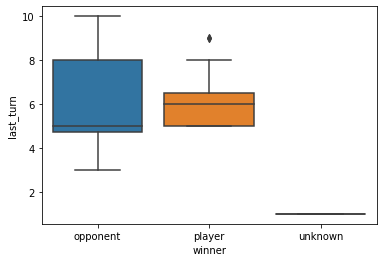

In [6]:
sns.boxplot(data=df_games, x='winner', y='last_turn')